In [53]:
import numpy as np
import matplotlib.pyplot as plt

b = 10
a =1
#f(x) and its derivatives
def f(x):
    x1, x2 = x
    return (a + 1 - x1) ** 2 + b * (x2 - x1 ** 2) ** 2

def grad_f(x):
    x1, x2 = x
    df_dx1 = -2 * (a + 1 - x1) - 4 * b * x1 * (x2 - x1 ** 2)
    df_dx2 = 2 * b * (x2 - x1 ** 2)
    return np.array([df_dx1, df_dx2])

def hessian_f(x):
    x1, x2 = x
    h11 = 2 - 4 * b * (x2 - 3 * x1 ** 2)
    h12 = -4 * b * x1
    h21 = h12
    h22 = 2 * b
    return np.array([[h11, h12], [h21, h22]])


In [54]:
x0 = np.array([-1.5, 1.5])  # Starting point
taus = [10 ** -p for p in range(1, 13)]  # Tolerance levels

# Newton's Method
def newton_method(x0, tau):
    x = x0
    iterations = 0
    trajectory = [x0]  # Store trajectory for plotting
    while np.linalg.norm(grad_f(x)) > tau:
        H_inv = np.linalg.inv(hessian_f(x))  # Inverse of the Hessian
        x = x - H_inv @ grad_f(x)  # Newton's step
        trajectory.append(x)
        iterations += 1
    return x, f(x), iterations, trajectory

# Gradient Descent
def gradient_descent(x0, tau, lr=0.001):
    x = x0
    iterations = 0
    trajectory = [x0]  # Store trajectory for plotting
    while np.linalg.norm(grad_f(x)) > tau:
        x = x - lr * grad_f(x)  # Gradient descent step
        trajectory.append(x)
        iterations += 1
    return x, f(x), iterations, trajectory


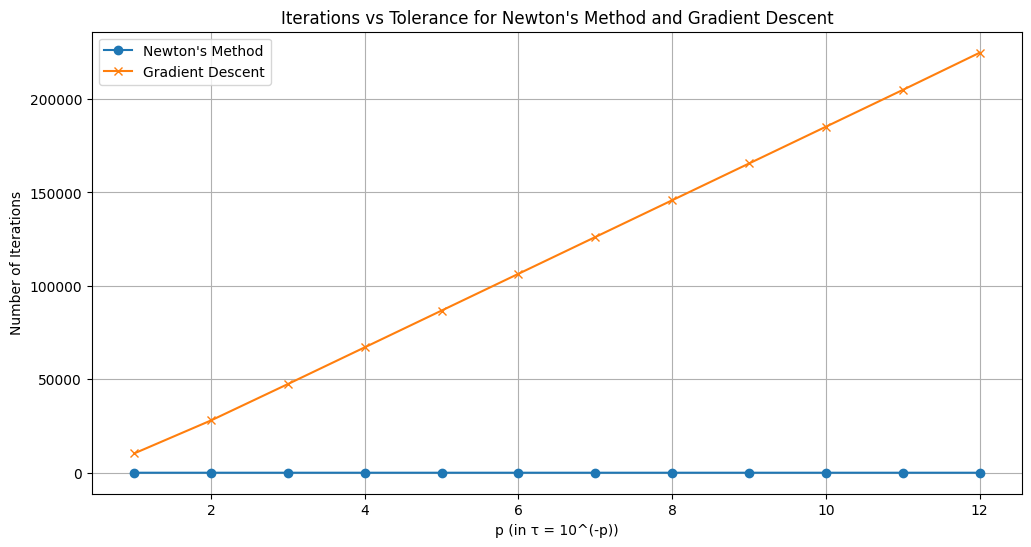

In [ ]:
newton_results = []
gd_results = []
k = 0
for tau in taus:
    newton_results.append(newton_method(x0, tau))
for tau in taus:
    gd_results.append(gradient_descent(x0, tau))

# Extract results for plotting
newton_iters = [res[2] for res in newton_results]
gd_iters = [res[2] for res in gd_results]

# Plot iterations vs tolerance
plt.figure(figsize=(12, 6))
plt.plot(range(1, 13), newton_iters, label="Newton's Method", marker='o')
plt.plot(range(1, 13), gd_iters, label="Gradient Descent", marker='x')
plt.xlabel("p (in τ = 10^(-p))")
plt.ylabel("Number of Iterations")
plt.title("Iterations vs Tolerance for Newton's Method and Gradient Descent")
plt.legend()
plt.grid()
plt.show()


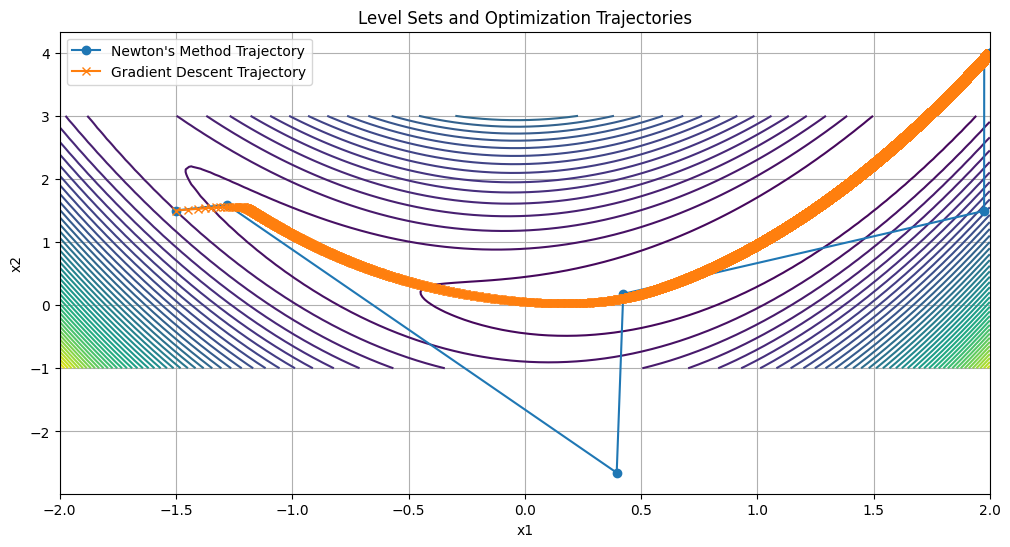

    Tolerance (τ)  Newton's Iterations  GD Iterations  \
0    1.000000e-01                    5          10326   
1    1.000000e-02                    7          27996   
2    1.000000e-03                    7          47455   
3    1.000000e-04                    7          67112   
4    1.000000e-05                    7          86789   
5    1.000000e-06                    7         106468   
6    1.000000e-07                    7         126148   
7    1.000000e-08                    7         145827   
8    1.000000e-09                    8         165506   
9    1.000000e-10                    8         185186   
10   1.000000e-11                    8         204871   
11   1.000000e-12                    8         224778   

                             Newton's Minima  \
0    [1.976086719064771, 3.9049184749548393]   
1   [1.9999999986679724, 3.9999999946718763]   
2   [1.9999999986679724, 3.9999999946718763]   
3   [1.9999999986679724, 3.9999999946718763]   
4   [1.99999999866

In [56]:
# Plot level sets and trajectories for a specific tau
tau_plot = taus[10]  # Choose a specific tau for detailed trajectory plotting
_, _, _, newton_traj = newton_method(x0, tau_plot)
_, _, _, gd_traj = gradient_descent(x0, tau_plot)

x1_vals = np.linspace(-2, 2, 100)
x2_vals = np.linspace(-1, 3, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f([X1, X2])

plt.figure(figsize=(12, 6))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
newton_traj = np.array(newton_traj)
gd_traj = np.array(gd_traj)
plt.plot(newton_traj[:, 0], newton_traj[:, 1], label="Newton's Method Trajectory", marker='o')
plt.plot(gd_traj[:, 0], gd_traj[:, 1], label="Gradient Descent Trajectory", marker='x')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Level Sets and Optimization Trajectories")
plt.legend()
plt.grid()
plt.show()

# Tabular summary of results
import pandas as pd
data = {
    "Tolerance (τ)": taus,
    "Newton's Iterations": newton_iters,
    "GD Iterations": gd_iters,
    "Newton's Minima": [res[0] for res in newton_results],
    "GD Minima": [res[0] for res in gd_results],
    "Newton's Objective": [res[1] for res in newton_results],
    "GD Objective": [res[1] for res in gd_results],
}
df = pd.DataFrame(data)
print(df)